### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [395]:
data = pd.read_csv('data/coupons.csv')

In [396]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 2. Investigate the dataset for missing or problematic data.

In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### Analysis of Missing Data
Most columns have few to no blanks, except for the "car" column. There are far too many blanks to just drop all of them, so i will have to ignore the blanks in the "car" column for now. Looking at the data description, it seems like the data is only sorted into a handful of string values, so outlier analysis is not really possible.

## 3. Decide what to do about your missing data -- drop, replace, other...

### Deciding what data to drop
There are too many missing values in the car column to drop, so I am going to drop the other rows with empty values. The only concern is if there are enough values remaining after the drop to continue my analysis.

In [398]:
data = data.dropna(subset = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
data.shape

(12079, 26)

The removal of the empty rows only removed 605 rows, there is still a sufficiently large dataset to perform further analysis. 

## 4. What proportion of the total observations chose to accept the coupon? 



### Calculating Acceptance of Coupons

The proportion of those who accepted the coupon is: (the drivers who accepted the coupon) / (total recipients of coupons).

In [399]:
# If Y = 1, then they accepted the coupon.
(data['Y'] == 1).sum()

6877

In [400]:
data.shape[0]

12079

In [401]:
general_acceptance = (data['Y'] == 1).sum()/data.shape[0]
general_acceptance

0.5693352098683666

Acceptance Rate is around 57%.

## 5. Use a bar plot to visualize the `coupon` column.

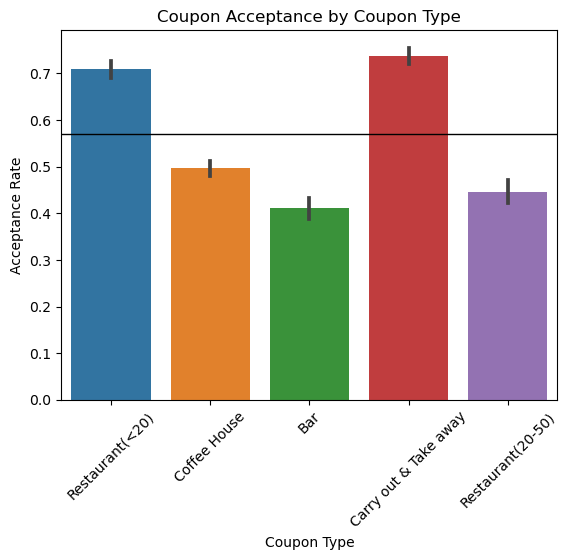

In [402]:
# Graph the counts for how many of each type of coupon was accepted
sns.barplot(data, x = 'coupon', y = 'Y')
plt.xticks(rotation=45)
plt.title("Coupon Acceptance by Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Acceptance Rate")
plt.axhline(y=general_acceptance,linewidth=1, color='k')

The barplot includes a line for the general acceptance rate. This allows us to easily notice that there is a difference in acceptance rate between the type of coupons.

## 6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

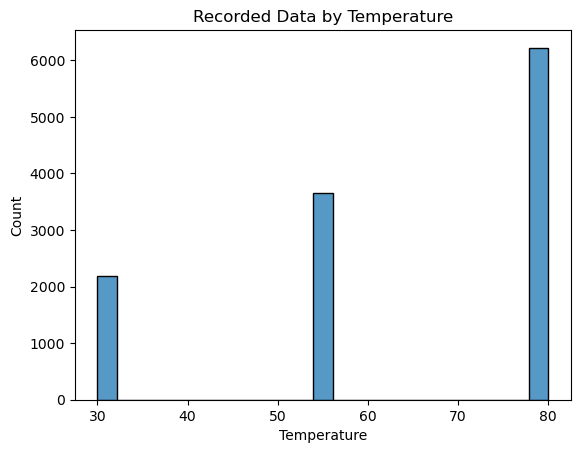

In [403]:
# This graph will gice us a sense of whether there was a bias in the dataset based around temperature.
sns.histplot(data, x = 'temperature')
plt.title("Recorded Data by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")

We can see from the chart that the data does not contain any real time temperature measuring, and most likely only had three available options for recording the temperature. This would explain why there are only three possible temperatures throughout the dataset. Also of note, there is enough data in all three temperatures that we can analyze the three temperatures individually. I am going to analyze acceptance rate by temperature to see if any immediate difference jump out at me.

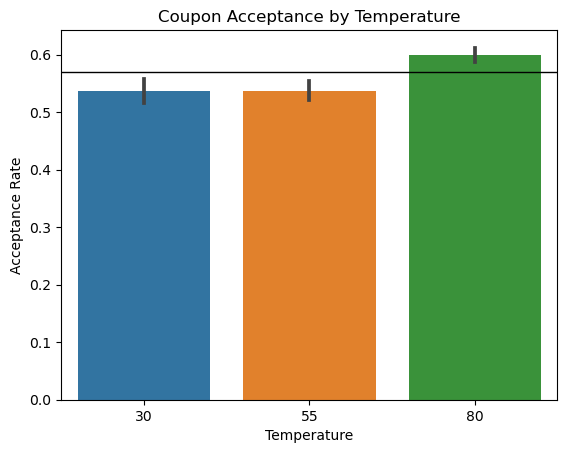

In [404]:
# There is a fairly significant difference in quantity, but there are enough samples of each to compare the groups.
# Let's see if there is a clear connection between coupon acceptance and temperature.
sns.barplot(data, x = 'temperature', y = 'Y')
plt.title("Coupon Acceptance by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Acceptance Rate")
plt.axhline(y=general_acceptance,linewidth=1, color='k')

There doesn't seem to be a massive difference in acceptance rate by temperature.

# **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

## 1. Create a new `DataFrame` that contains just the bar coupons.


This is a simple matter of selection. Since the "coupon" column will be unnecessary, i will also take this chance to drop that column.

In [405]:
coupons = data[data['coupon'] == 'Bar']
coupons.drop(['coupon'], axis = 1)

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,1d,Male,21,Single,0,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,1d,Male,21,Single,0,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,1d,Male,21,Single,0,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,1d,Male,46,Single,0,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,1d,Male,46,Single,0,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,2h,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,2h,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,0,0,1,0


## 2. What proportion of bar coupons were accepted?


Since our new dataframe "coupons" is just the bar coupons, I will just calculate the acceptance rate of the dataframe.

In [406]:
coupons['Y'].value_counts()[1]/coupons.shape[0]

0.41191845269210664

## 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


To start, I need to get an idea of the different possible values of the 'Bar' column. To create the groupings, i need to merge the values into two groups, accoding to the prompt.

In [407]:
coupons['Bar'].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

According to the prompt, i will merge the values "never", "less1", and "1~3" values using a query. I will also merge the values "4~8" and "gt8" as well.

In [408]:
threeless = coupons.query("(Bar == 'never') or (Bar == 'less1') or (Bar == '1~3')")
threeless.shape

(1720, 26)

In [409]:
morethanthree = coupons.query("((Bar == '4~8') or (Bar == 'gt8'))")
morethanthree.shape

(193, 26)

I can confirm that my groupings have the correct size, so now I just need to find the acceptance rate for my two groupings.

In [410]:
threeless['Y'].value_counts()[1]/threeless.shape[0]

0.37267441860465117

In [411]:
morethanthree['Y'].value_counts()[1]/morethanthree.shape[0]

0.7616580310880829

There is a clear difference between the two groupings, and it is safe to conclude that drivers who went to a bar more than 3 times a month had a much higher acceptance rate.

## 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


The first step is to create the two groupings for the given problem. Using the '.shape' method is a good way to ensure that my queries are properly subsetting the dataframe.

In [412]:
coupons.shape

(1913, 26)

In [413]:
target_drivers = coupons.query("((Bar == '1~3') or (Bar == '4~8') or (Bar == 'gt8')) and ((age != '21') or (age != 'below21'))")
target_drivers.shape

(572, 26)

In [414]:
other_drivers = coupons.query("not (((Bar == '1~3') or (Bar == '4~8') or (Bar == 'gt8')) and ((age != '21') or (age != 'below21')))")
other_drivers.shape

(1341, 26)

The subsetting seems to have worked correctly, so I can continue the analysis.

In [415]:
target_drivers['Y'].value_counts()[1]/target_drivers.shape[0]

0.6853146853146853

In [416]:
other_drivers['Y'].value_counts()[1]/other_drivers.shape[0]

0.2953020134228188

There seems to be a significant difference in acceptance rate based on the proposed subset

## 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


This question is somewhat vaguely worded, so I will interpret thhis as being a comparison between drivers who had all three conditions and those who do not have all three conditions:
1. drivers who go to bars more than once a month 
2. drivers who had passengers that were not a kid 
3. drivers who had occupations other than farming, fishing, or forestry. 

In [417]:
special_drivers = coupons.query("((Bar == '1~3') or (Bar == '4~8') or (Bar == 'gt8')) and (passanger != 'Kid(s)') and (occupation != 'Farming Fishing & Forestry')")
special_drivers.shape

(530, 26)

In [418]:
normal_drivers = coupons.query("not (((Bar == '1~3') or (Bar == '4~8') or (Bar == 'gt8')) and (passanger != 'Kid(s)') and (occupation != 'Farming Fishing & Forestry'))")
normal_drivers.shape

(1383, 26)

In [419]:
special_drivers['Y'].value_counts()[1]/special_drivers.shape[0]

0.7094339622641509

In [420]:
normal_drivers['Y'].value_counts()[1]/normal_drivers.shape[0]

0.29790310918293567

There is a significant difference in the acceptance rate of the two groups.

## 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



This first grouping has a trick to it. The data does not include a value in the marital status column that includes "widowed" as an option. There is a possible value of "divorced" as a marital status, but this is not equivalent to "widowed. Having a spouse die while married is very different to being divorced, so I will make the assumption that the question means "divorced" as it is also incorreclty stated in the header of this notebook.

Since these groups are not inherently distinct, we cannot use a summation of their shapes to confirm that our subsetting is valid. I will just have to double check the syntax manually to ensure the groupings are correct.

In [421]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed(divorced)
group1 = coupons.query("((Bar == '1~3') or (Bar == '4~8') or (Bar == 'gt8')) and (passanger != 'Kid(s)') and (maritalStatus != 'Divorced')")
group1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [422]:
# go to bars more than once a month and are under the age of 30
group2 = coupons.query("((Bar == '1~3') or (Bar == '4~8') or (Bar == 'gt8')) and ((age == '21') or (age == '26') or (age == 'below21'))")
group2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [423]:
# go to cheap restaurants more than 4 times a month and income is less than 50K
group3 = coupons.query("((Restaurant20To50 == '4~8') or (Restaurant20To50 == 'gt8')) and ((income == 'Less than $12500') or (income == '$12500 - $24999') or (income == '$25000 - $37499') or (income == '$37500 - $49999'))")
group3

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
1613,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Female,26,Single,...,1~3,gt8,gt8,gt8,1,0,0,0,1,1
1624,Home,Alone,Sunny,55,6PM,Bar,1d,Female,26,Single,...,1~3,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12281,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,gt8,4~8,4~8,4~8,1,1,1,0,1,1
12459,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,41,Divorced,...,less1,less1,1~3,4~8,1,1,0,0,1,0
12460,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,41,Divorced,...,less1,less1,1~3,4~8,1,1,0,0,1,1
12463,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,41,Divorced,...,less1,less1,1~3,4~8,1,1,0,0,1,0


Now that we have our groupings, we can calculate the acceptance rates.

In [424]:
group1['Y'].value_counts()[1]/group1.shape[0]

0.7059961315280464

In [425]:
group2['Y'].value_counts()[1]/group2.shape[0]

0.7195121951219512

In [426]:
group3['Y'].value_counts()[1]/group3.shape[0]

0.7464788732394366

There does not seem to be a significant difference in the acceptance rate of the three groupings.

## 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

There was clearly a big difference in acceptance when looking at people who visited a bar more than 3 times a month and combining it with other conditions. The data also paints a compelling picture that younger, heavier drinkers who make less money seem to be more prone to accepting the coupon offer. The ony analysis that did not show any significant difference was the groupings for problem 6. The acceptance rate of the three subsets was higher than the gneeral acceptance rate, but the rate wasn't different between the three groupings themselves. This is also a grouping where al three groups could have largely the same members, so further analysis is necessary to determine if the members are different.

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I decided to investigate the drivers who were offered the Coffee House coupon and why.

In [428]:
coffee_coups = data[data['coupon'] == 'Coffee House']
coffee_coups.drop(['coupon'], axis = 1)

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,2h,Male,21,Single,0,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,1d,Male,21,Single,0,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,2h,Male,21,Single,0,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,1d,Male,21,Single,0,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,2h,Male,21,Single,0,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,2h,Male,31,Married partner,1,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,1d,Male,31,Married partner,1,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,2h,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,2h,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,0,0,1,0


to start, I need the general acceptance rate of coffee coupons for comparison.

In [429]:
coffee_coups['Y'].value_counts()[1]/coffee_coups.shape[0]

0.49633123689727465

Now I want to see if there is any relationship with how often a driver visits a coffee shop. First I need to know the possible values.

In [430]:
coffee_coups['CoffeeHouse'].value_counts()

less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: CoffeeHouse, dtype: int64

There is a significant differenc in the counts of each possible value, ubt I think there are sufficient quantities to continue this analysis.

In [431]:
not_drinkers = coffee_coups.query("CoffeeHouse == 'never'")
not_drinkers['Y'].value_counts()[1]/not_drinkers.shape[0]

0.17522321428571427

In [432]:
light_drinkers = coffee_coups.query("CoffeeHouse == 'less1'")
light_drinkers['Y'].value_counts()[1]/light_drinkers.shape[0]

0.48098859315589354

In [433]:
moderate_drinkers = coffee_coups.query("CoffeeHouse == '1~3'")
moderate_drinkers['Y'].value_counts()[1]/moderate_drinkers.shape[0]

0.647693817468106

In [434]:
big_drinkers = coffee_coups.query("CoffeeHouse == '4~8'")
big_drinkers['Y'].value_counts()[1]/big_drinkers.shape[0]

0.6824457593688363

In [435]:
heavy_drinkers = coffee_coups.query("CoffeeHouse == 'gt8'")
heavy_drinkers['Y'].value_counts()[1]/heavy_drinkers.shape[0]

0.6578947368421053

Looking only at the acceptance rates varied by the number of times the driver reported going to a coffee house, there is a significant trend where the rate increases the more the driver visits a coffee house.

To further analyze this trend, I decided to group the data into drivers who visit coffee houses less than once a month and those who visit more than once a month.

In [436]:
lessone = coffee_coups.query("(CoffeeHouse == 'never') or (CoffeeHouse == 'less1')")
lessone['Y'].value_counts()[1]/lessone.shape[0]

0.34034907597535935

In [437]:
moreone = coffee_coups.query("(CoffeeHouse == '1~3') or (CoffeeHouse == '4~8') or (CoffeeHouse == 'gt8')")
moreone['Y'].value_counts()[1]/moreone.shape[0]

0.6589935760171306

There is a significant difference between the two groups, so I will continue testing this grouping.

Next, I want to see if weather has an effect on this new grouping.

In [438]:
bright = moreone.query("weather == 'Sunny'")
bright['Y'].value_counts()[1]/bright.shape[0]

0.6742470805162877

In [439]:
rainy = moreone.query("weather == 'Rainy'")
rainy['Y'].value_counts()[1]/rainy.shape[0]

0.59375

In [440]:
snowy = moreone.query("weather == 'Snowy'")
snowy['Y'].value_counts()[1]/snowy.shape[0]

0.5310344827586206

In this grouping, there is a difference in acceptance rate, with snowy weather seemingly casuing a decrease in acceptance rate, and with sunny weather having the highest acceptance rate.

From this analysis, I conclude that while weather has a mild effect on acceptance rate, one of the biggest factors in acceptance rate is how oftne a driver visits a coffee shop. This tendency is in line with the previous bar analysis, and seems to suggest that drivers ar emore likely to accept coupons to place they already visit frequently.